# Parameter fairness
Our intuition is that it is some sense "unfair" to compare CNNs and FNNs on their sample complexity for two reasons.
1. Their parameter counts are completely different. We should expect sample complexity to increase with parameter count.
2. The "dumb" CNN is unable to learn even a simple linear classifier. Therefore the models have totally different representation abilities.

We address each of these concerns by measuring the sample complexities against the quadratic labelling task for the following models.
1. A range of "dumb" CNN models with increasing parameter counts. (This notebook)
2. A "minimal" CNN that can at least learn a simple linear classifier. (Next notebook)

## Experiment 1 - Parameter-fair dumb CNN

In [29]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
from IPython.core.magic import register_cell_magic
ipython = get_ipython()

# New cell magic to use python variables in cell magic
@register_cell_magic
def format(line, cell):
    magic, program = line.split(' ')
    ipython.run_cell_magic(magic, program, cell.format(**globals()))

In [30]:
# Experiment variables
max_epochs      = 200 # Maximum number of training epochs per split
norm            = 2 # Labelling function parameter
accuracy        = 90 # Goal accuracy for convergence
proportion      = 0.5 # Proportion of FCNN parameters.
delete_results  = False # Delete results of previous runs for that parameter set (all models).
filepath        = 'results/week3/p'+str(norm)+'_acc'+str(accuracy)+'_e'+str(max_epochs)+'.pkl' # Results file

In [31]:
%%format script bashb
python dim_vs_tr_size.py -actv "Quad" -arch "ParamFairCNN" -prop {proportion} -min 4 -max 6 -f {filepath} -e {max_epochs} -p {norm} -acc {accuracy} -del {delete_results}

Windows PowerShell
Copyright (C) Microsoft Corporation. All rights reserved.

Try the new cross-platform PowerShell https://aka.ms/pscore6

PS C:\Users\oilio\Documents\School Documents\EPFL\MA3\Semester Project\Tasks> python dim_vs_tr_size.py -actv "Quad" -arch "ParamFairCNN" -prop 0.5 -min 4 -max 6 -f results/week3/p2_acc0.8_e100.pkl -e 100 -p 2 -acc 0.8 -del True
Using device:  cpu 

----------------------------------------------------------------.0% Complete
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 15359, 4, 4]          61,436
         Quadratic-2          [-1, 15359, 4, 4]               0
         AvgPool2d-3          [-1, 15359, 1, 1]               0
            Linear-4                    [-1, 1]          15,360
           Sigmoid-5                    [-1, 1]               0
Total params: 76,796
Trainable params: 76,796
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB)

In [31]:
to_keep = ["ParamFairCNN+Quad" + pr for pr in ["{:.1f}".format(val) for val in np.arange(1,11)/10]]

In [32]:
# Option del - delete contents of results file
with open(filepath, 'rb+') as file:
    results = pickle.load(file)

# Filter out results with same name
with open(filepath, 'wb+') as file:
    filtered = {(name, size) : val for (name, size), val in results.items() if name in to_keep}
    pickle.dump(filtered, file)

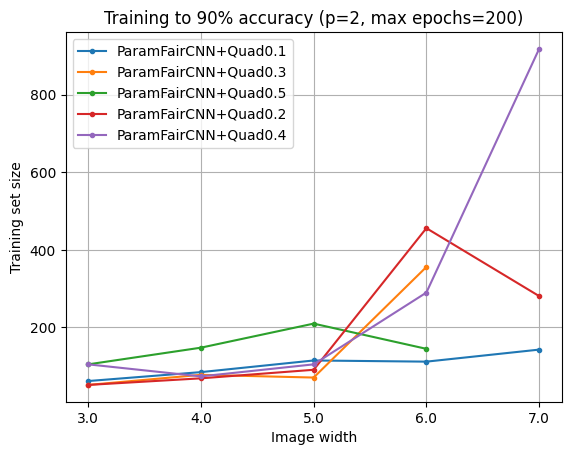

In [34]:
# Load data
with open(filepath, 'rb') as file:
    sample_complexity = pickle.load(file)

# Extract data to plot
names = set([name for name, _ in sample_complexity.keys()])

# For every model, make line plot
for i, name in enumerate(names):
    x, y = list(zip(*sorted([(int((dim/3)**0.5), tr_size) for (_name, dim), tr_size  in sample_complexity.items() if name == _name])))
    plt.plot(x, y, marker='.', linestyle='-', label=name)
    
# Plot graphics
plt.xlabel('Image width')
plt.ylabel('Training set size')
plt.xticks(ticks=[tick for tick in plt.xticks()[0]][1::2], labels=[tick for tick in plt.xticks()[1]][1::2])
plt.title(f'Training to {(accuracy)}% accuracy (p={norm}, max epochs={max_epochs})')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()